Análise de Dados explorando o conceito do Net Promoter Score (NPS), uma métrica fundamental para entender a satisfação do cliente.

In [ ]:
"""
Este código baixa um arquivo CSV de feedbacks do Google Drive e carrega os dados em um DataFrame pandas.

O arquivo é identificado por um ID único ('file_id'), que é extraído da URL do arquivo no Google Drive.
A URL do arquivo no Google Drive tem o seguinte formato:
https://drive.google.com/file/d/FILE_ID/view?usp=sharing
"""

In [4]:
import gdown
import pandas as pd

file_id = '1_nyLNsT55X37Y0KDBXVXzSYsX-SoSqZi'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'dados/feedbacks.csv')

dados = pd.read_csv('dados/feedbacks.csv', delimiter=';')

Downloading...
From: https://drive.google.com/uc?id=1_nyLNsT55X37Y0KDBXVXzSYsX-SoSqZi
To: /home/alexmend/Documentos/projeto-python-etl-ia-nps/dados/feedbacks.csv
100%|██████████| 365/365 [00:00<00:00, 1.70MB/s]


In [ ]:
"""
Versão 1: Paradigma Imperativo.

Este script lê um arquivo CSV contendo feedback de usuários, no qual cada feedback tem uma nota associada.
O NPS é calculado como a diferença entre o percentual de promotores (nota >= 9) e detratores (nota <= 6), multiplicada por 100.
A implementação é realizada de uma maneira imperativa, onde os comandos são executados sequencialmente.
"""

In [16]:
# realizando a leitura da planilha
import pandas as pd

dados = pd.read_csv('dados/feedbacks.csv', delimiter=';')

In [17]:
# consultando os dados
dados.head(10)

,nota,comentario
0,10,"Excelente Bootcamp, estou muito satisfeita!"
1,9,"Bootcamp top, mas mentorias de IA o tornariam ..."
2,6,"Um Bootcamp razoável, torcendo para o próximo ..."
3,10,"Bootcamp incrível, continuem potencializando a..."
4,7,"O Bootcamp foi ok, nada de especial."
5,9,Show de bola!
6,10,Melhor Bootcamp de todos!
7,0,Horrível!


In [18]:
# identificando qtde de detratores e promotores
detratores = 0
promotores = 0

notas = dados['nota']
notas

0    10
1     9
2     6
3    10
4     7
5     9
6    10
7     0
Name: nota, dtype: int64

In [19]:
# localizando todas as notas dentro da estrutura de dados e contando a qtde de detratores e promotores
# para o nps as notas 7 e 8 são neutras e não estamos utilizamos no cálculo
for nota in notas:
    if nota >= 9:
        promotores += 1
    elif nota <= 6:
        detratores += 1

In [20]:
# realizando cálculo nps em porcentagem
nps = (promotores - detratores) / len(notas) * 100
nps

37.5

In [ ]:
"""
Versão 2: Paradigma Funcional.

Este código segue uma abordagem funcional para calcular o NPS a partir dos dados de feedback.
A função "calcular_nps" é definida para encapsular a lógica do cálculo do NPS. Esta versão apresenta
uma separação de responsabilidades mais clara do que a versão imperativa, além de melhorias de código pontuais.
"""

In [21]:
import pandas as pd

def calcular_nps(notas):

    # identificando qtde de detratores e promotores
    # para detratores utilizando função apply do pandas com função lambda
    detratores = sum(notas.apply(lambda nota: nota <= 6))
    # para promotores utilizando tb o pandas mas com conceito de indexação booleana para fazer o count
    promotores = notas[notas >= 9].count()

    # realizando cálculo nps em porcentagem
    return (promotores - detratores) / len(notas) * 100

notas = dados['nota']

calcular_nps(notas)

37.5

In [ ]:
"""
Versão 3: Paradigma Orientado a Objetos (POO).

Este script adota uma abordagem Orientada a Objetos (OO) para calcular o NPS a partir de feedback de usuários.
Duas classes são definidas, onde:
- Feedback representa um único feedback de usuário;
- AnalisadorFeedback é usado para calcular o NPS a partir de uma lista de Feedbacks.
A POO fornece uma abstração mais clara dos dados e comportamentos envolvidos no cálculo do NPS.
Desta forma, a solução estará preparada para as evoluções do nosso projeto.
"""

In [5]:
import pandas as pd

class Feedback:
    def __init__(self, nota, comentario):
        self.nota = nota
        self.comentario = comentario

class AnalisadorFeedback:
    def __init__(self, feedbacks):
        self.feedbacks = feedbacks
    
    def calcular_nps(self):

        # Por ser uma list do Python, aplicando conceito de 'list comprehension' para filtrar os Feedbacks
        detratores = sum([1 for feedback in self.feedbacks if feedback.nota <= 6])
        promotores = sum([1 for feedback in self.feedbacks if feedback.nota >= 9])

        nps = (promotores - detratores) / len(self.feedbacks) * 100

        return nps

# Convertendo os dados dentro do Dataframe com lista de notas para uma lista de feedbacks
feedbacks = [Feedback(linha['nota'], linha['comentario']) for indice, linha in dados.iterrows()]

In [23]:
# verificando se os objetos estão sendo carregados
feedbacks

In [6]:
# Consultando se os dados estão sendo armazenados corretamente
for feedback in feedbacks:
    print(feedback.nota)

10
9
6
10
7
9
10
0


In [7]:
# Consultando se os dados estão sendo armazenados corretamente
for feedback in feedbacks:
    print(feedback.comentario)

Excelente Bootcamp, estou muito satisfeita!
Bootcamp top, mas mentorias de IA o tornariam perfeito.
Um Bootcamp razoável, torcendo para o próximo ser de Python.
Bootcamp incrível, continuem potencializando a educação aberta!
O Bootcamp foi ok, nada de especial.
Show de bola!
Melhor Bootcamp de todos!
Horrível!


In [8]:
# Instanciando AnalisadorFeedback e calculando nps
analisador = AnalisadorFeedback(feedbacks)
nps = analisador.calcular_nps()
nps

37.5

Extração dados do NPS e aplicar as técnicas de ETL (Extração, Transformação e Carregamento) nesses dados. Com a ajuda da biblioteca matplotlib, será criado um gráfico para visualizar e compreender o nível de satisfação dos usuários. Para conseguir entregar valor da informação e contribuir na tomada de descisão

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Definição das constantes que usaremos para visualizar o NPS
NPS_ZONAS =   ['Crítico', 'Aperfeiçoamento', 'Qualidade', 'Excelência']
NPS_VALORES = [-100, 0, 50, 75, 100]
NPS_CORES =   ['#FF595E', '#FFCA3A', '#8AC926', '#1982C4']

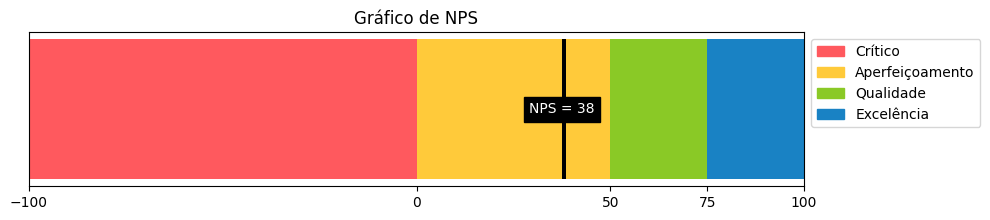

In [10]:
# Criar um gráfico usando "matplotlib" para visualizar o NPS calculado
def criar_grafico_nps(nps):
    fig, ax = plt.subplots(figsize=(10, 2))

    for i, zona in enumerate(NPS_ZONAS):
        ax.barh([0], width=NPS_VALORES[i+1]-NPS_VALORES[i], left=NPS_VALORES[i], color=NPS_CORES[i])

    # plotando o valor do nps
    ax.barh([0], width=1, left=nps, color='black')

    # removendo valores do eixo y
    ax.set_yticks([])

    # delimitando o tamanho do gráfico para ajustar com o valor do eixo x
    ax.set_xlim(-100, 100)

    # removendo valores intermediários do eixo x
    ax.set_xticks(NPS_VALORES)

    # colocando no gráfico o texto e valor do NPS com alinhamento e 0 casas decimais
    plt.text(nps, 0, f'NPS = {nps:.0f}', ha='center', va='center', color='white', bbox=dict(facecolor='black'))

    # com a biblioteca de mpatches para criar legenda navegando pelos índices
    patches = [mpatches.Patch(color=NPS_CORES[i], label=NPS_ZONAS[i]) for i in range(len(NPS_ZONAS))]
    plt.legend(handles=patches, bbox_to_anchor=(1,1))

    # inserindo título no gráfico
    plt.title('Gráfico de NPS')

    plt.show()

criar_grafico_nps(nps)

Utilizar as técnicas de Processamento de Linguagem Natural (PLN) para analisar os sentimentos expressos nos comentários associados às notas de NPS. Dessa forma, teremos uma perspectiva qualitativa que complementa os dados quantitativos.

In [13]:
import os
from dotenv import load_dotenv
# Documentação Oficial da API OpenAI: https://platform.openai.com/docs/api-reference/introduction
# Informações sobre o Período Gratuito: https://help.openai.com/en/articles/4936830

# Para gerar uma API Key:
# 1. Crie uma conta na OpenAI
# 2. Acesse a seção "API Keys"
# 3. Clique em "Create API Key"
# Link direto: https://platform.openai.com/account/api-keys

# Utilizando arquivo .env para armazenar dados sensíveis e carregando as variáveis deste arquivo
load_dotenv()
openai_api_key = os.getenv('openai_api_key')

In [ ]:
"""
Integrar com o ChatGPT e usá-lo como um modelo para análise de sentimentos dos comentários.
Seguem alguns links úteis:
1. Endpoint que será consumido: https://platform.openai.com/docs/api-reference/chat/create
2. Collection Postman da OpenAI: https://www.postman.com/devrel/workspace/openai/documentation/13183464-90abb798-cb85-43cb-ba3a-ae7941e968da
"""

In [16]:
# pip install openai==0.28
# Todo o código abaixo foi baseado na versão acima da biblioteca openai

In [14]:
import openai

openai.api_key = openai_api_key

def analisar_sentimentos(feedbacks):

    comentarios_formatados = "\n".join([f"- Nota {feedback.nota}! {feedback.comentario}" for feedback in feedbacks])

    # info q o chatgpt receberá para enviar resposta
    prompt = f"""
            Sintetize uma análise geral sobre os seguintes comentário:
            {comentarios_formatados}
            """

    # consumindo endpoint ChatCompletion
    respostaAPI = openai.ChatCompletion.create(
        model="gpt-4",
        messages=[
        {
            "role": "system",
            "content": "Você é um modelo de análise de sentimentos com foco em feedbacks sobre experiências educacionais."
        },
        {
            "role": "user",
            "content": prompt
        }
        ]
    )
    # Percorrendo a estrutura de dados conforme orientação API chatgpt e pegando apenas a resposta em texto
    return respostaAPI.choices[0].message.content

insights = analisar_sentimentos(feedbacks)

In [15]:
insights

'A análise dos comentários indica que a percepção geral deste bootcamp é predominantemente positiva, com a maioria das respostas apresentando alta pontuação (notas entre 6 a 10), elogiando a qualidade e eficácia do programa. Sua importância para a educação aberta também foi ressaltada. Por outro lado, alguns feedbacks sugerem que há espaço para melhoria. De particular, os participantes gostariam de ver inclusos tópicos como Inteligência Artificial e linguagem de programação Python. Além disso, um feedback foi extremamente negativo (nota 0), mas não detalhou as razões específicas dessa insatisfação, tornando difícil identificar as áreas de melhoria diretamente desse comentário. No geral, embora haja espaço para melhorar algumas áreas, o bootcamp é altamente valorizado pelos seus participantes.'